# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)

First Student Name and ID: Tejasri Katikapally and  1002032909  , Divyasri Morasa and 1002032910 , HemaSai Desai 1002029973



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Any other relevant import for feature extraction

# Loading the dataset

In [2]:
#load the dataset file "dataset_NB.csv"

df = pd.read_csv("dataset_NB.csv")

df.head(8)   #prints top 5 rows of the dataset

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0
5,i just had to jump in here as carbonara is on...,0.0
6,the scotsman NUMBER august NUMBER playboy want...,0.0
7,martin adamson wrote isn t it just basically a...,0.0


# Preprocessing 

In [3]:
count_nullvalues = df.isnull().sum() # counts the number of null values in each column
count_emptystrings = (df == '').sum() # counts the number of empty strings in each column
print(count_nullvalues)
print("\nEmpty string count :")
print(count_emptystrings)


email     1
label    16
dtype: int64

Empty string count :
email    0
label    0
dtype: int64


* We can notice 1 null value for email column and 16 null values for label column  and no empty strings
* In the next step we will handle the those null values

In [5]:

# Handle NaN values in column 'label', email

df['label'] = df['label'].fillna(0)
df = df.dropna(subset=['email'])   # dropping non infinite values


count_nullvalues = df.isnull().sum() # counts the number of null values in each column
count_emptystrings = (df == '').sum() # counts the number of empty strings in each column
print(count_nullvalues)
print("\n Empty string count : ")
print(count_emptystrings)

email    0
label    0
dtype: int64

 Empty string count : 
email    0
label    0
dtype: int64


In [33]:
import re

def preprocess(txt):
    if isinstance(txt, str):
        txt = txt.lower()   #converting uppercase to lowercase 
        headerss = ["from:", "to:", "subject:", "cc:", "bcc:"]  #Removing email headers
        for h in headerss:
            index = txt.find(h)
            if index != -1:
                txt = txt[index+len(h):]
        txt = re.sub(r'[^\w\s]', '', txt)
        txt=txt.replace("_","")
        txt = re.sub(r'http\S+', '', txt) #removing URLS
    return txt

In [36]:

# Applying preprocess function to the 'email' column
df['email'] = df['email'].apply(preprocess)



* Loading dataset after preprocessing and naming modified dataset as "updated_NB_dataset"

In [35]:
df.to_csv('updated_NB_dataset.csv')

# Extract features using Tf-Idf vector

In [47]:
# Preprocess
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Extract features using Tf-Idf vector

Tfidf_vect = TfidfVectorizer()
X_email = Tfidf_vect.fit_transform(df['email'])
y_label = df['label']
print(X_email)

  (0, 16789)	0.01913596919222321
  (0, 32378)	0.07519673102468251
  (0, 9531)	0.06491888647392673
  (0, 29158)	0.02341790567242496
  (0, 14423)	0.0325688933893922
  (0, 25292)	0.053566340553406165
  (0, 16358)	0.03344061437578647
  (0, 29468)	0.027408183703479517
  (0, 24605)	0.04419191278940722
  (0, 6406)	0.03672455252334629
  (0, 23941)	0.03846309942020854
  (0, 29459)	0.009609212282839574
  (0, 122)	0.03284917007685525
  (0, 2554)	0.02100380080864661
  (0, 12309)	0.03672455252334629
  (0, 682)	0.03368983982512522
  (0, 6617)	0.02820345938591898
  (0, 10619)	0.03007527666844925
  (0, 5045)	0.029489538032327834
  (0, 27814)	0.02511469183950533
  (0, 23214)	0.04544040812928729
  (0, 15465)	0.044917698511831805
  (0, 6135)	0.039692604861533004
  (0, 11317)	0.018084691770998574
  (0, 7824)	0.018233475528297724
  :	:
  (3014, 4612)	0.03066584924915485
  (3014, 25111)	0.0330995054896253
  (3014, 3419)	0.035240632969267244
  (3014, 8895)	0.02989882305011368
  (3014, 2086)	0.027217758107947

In [ ]:
Training and Modeling the data

In [21]:
# train_test_split

# Split the data into training and testing sets
# using 80% to data to train and 20% to test the data
X_train, X_test, y_train, y_test = train_test_split(X_email, y_label, test_size=0.2, random_state=46)




In [22]:
# Train a Naive Bayes classifier on the transformed data 
# Using GaussianNB model for classification
from sklearn.naive_bayes import GaussianNB
# Train the model on the training data

classification = GaussianNB()
classification.fit(X_train.toarray(), y_train)





GaussianNB()

In [41]:
# Make predictions on test data
y_pred = classification.predict(X_test.toarray())

# Metrics and plots
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('confusion_matrix \n', confusion_matrix)

Accuracy: 0.9253731343283582
confusion_matrix 
 [[480  14]
 [ 31  78]]


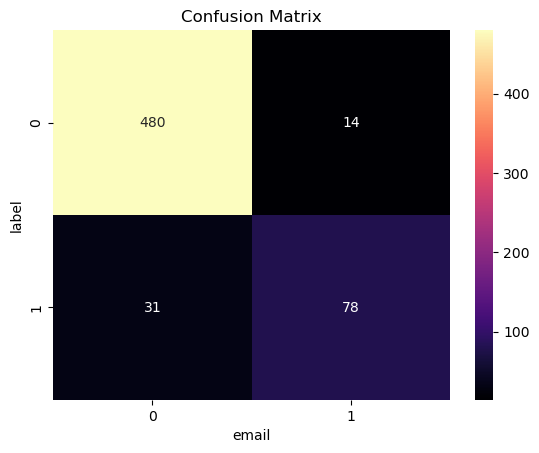

In [45]:
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='magma', fmt='d', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('email')
plt.ylabel('label')
plt.show()

Classification Report

In [44]:
# Print the classification report

report_for_classification = classification_report(y_test, y_pred)
print(report_for_classification)


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       494
         1.0       0.85      0.72      0.78       109

    accuracy                           0.93       603
   macro avg       0.89      0.84      0.87       603
weighted avg       0.92      0.93      0.92       603



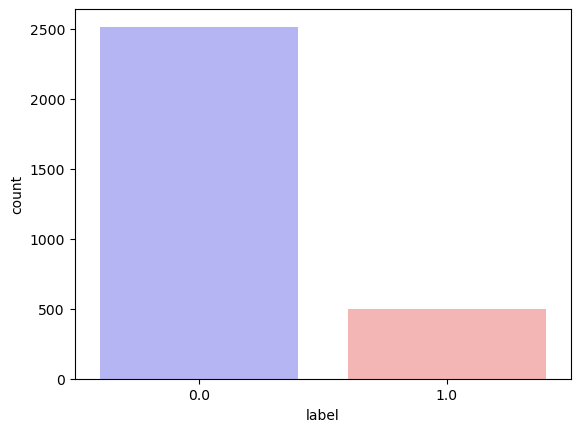

In [29]:
# Visualization for label
sns.countplot(x='label', data = df, palette='bwr')
plt.show()

# REPORT

* Load the dataset - >Load the given dataset file for Naive Bayes (dataset_NB.csv)
* Preprocessing  
      Technique used to preprocess is " Tf-Idf Vector" 
      Tf - Term Frequecy(How frequently a term [words] occurs in a document[sentence] )
      Idf- Inverse Document Frequency [Holds weights of rarely occured words]
      The result of Tf-Idf preprocessing is a vector representation of each sentence, where each element in the vector          corresponds to a particular term and its weight in the semtence
      
      Using " Tf-Idf Vector"  to extract features from the text (email) and transform the data.
 * Training the model  
    splitting the data as 80% to train the data and 20% to test it
  
 * classification is done by using Gaussian NB model
    Gaussian Naive Bayes: This is used for continuous data that follows a Gaussian distribution. It assumes that the features       are independent and have a Gaussian distribution
      
 * To evaluate the performance of a classification model.
 Accuracy Score and Confusion Matrix are calculated
 Accuracy score : The accuracy score is the proportion of classified instances over the total number of instances in                     the dataset 
 
 Confusion matrix : It is a table that shows the number of true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN) for each class in the dataset. It helps us visualize how model is doing for each class and identify any patterns and predictions
 Below are the results :
 Accuracy: 0.9253731343283582
 confusion_matrix 
 [[480  14]
 [ 31  78]]


# Extra - Can you do better?

The accuracy of Naive Bayes depends on problem and characteristics of dataset.

For example, For continuous features in data set  Gaussian Naive Bayes may perform better than Multinomial or Bernoulli Naive Bayes.
if dataset consists of discrete featuresthen Multinomial Naive Bayes may perform better


# contribution
Hema Desai focused more on nearest neighbors, DivyaSri worked primarily with decision trees, and Teja Sri worked with naive bayes. We had a discussion on the entire project assignment and shared our inputs to complete our parts with one another. We also corrected our mistakes and attempted to produce a higher accuracy rate.

#references

"Naive Bayes and Text Classification" by Jacob Perkins: https://www.ibm.com/cloud/learn/naive-bayes-explained"A Practical Explanation of a Naive Bayes Classifier" by Jeff Howbert: https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/"Naive Bayes Classifier: A Comprehensive Guide with Python Examples" by Kavita Ganesan: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn"The Naive Bayes Algorithm" by Jason Brownlee:

